In [474]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from matplotlib import style

In [400]:
ccm_analytics= pd.read_csv('CCM_Analytics.csv')
ccm_analytics.head()

,DateOfGame,Opponent,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,...,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored,WinOrLoss
0,1/19/2021,GB SouthWest,26,11,6,3,15,9,6,2,...,1.166667,1.666667,1.333333,2,1.600000,3,0.857143,6,93,Win
1,1/22/2021,Hortonville,8,7,6,0,1,6,2,2,...,0.222222,0.400000,0.428571,0,0.500000,1.5,0.000000,7,96,Win
2,1/23/2021,Appleton West,25,15,12,5,10,6,3,0,...,1.000000,0.500000,1.615385,#DIV/0!,0.500000,1.714285714,1.285714,11,99,Win
3,12/8/2020,Appleton East,40,10,10,4,30,12,8,2,...,1.210526,1.294118,0.600000,2,1.250000,0,1.000000,6,86,Win
4,1/29/2021,Kimberly,20,10,8,3,10,11,4,2,...,0.666667,0.800000,1.000000,0,0.888889,1.5,0.000000,7,65,Loss


In [402]:
# Check to see if any columns do not have a value 
ccm_analytics.isna().sum()

DateOfGame                                      0
Opponent                                        0
TotalPoint                                      0
FirstHalfPoint                                  0
FirstHalfFieldGoalAttempts                      0
FirstHalfFieldGoalsMade                         0
SecondHalfPoint                                 0
SecondHalfFieldGoalAttempts                     0
SecondHalfFieldGoalsMade                        0
FreeThrowsAttemptedFirstHalf                    0
FreeThrowsMadeFirstHalf                         0
FreeThrowsAttemptedSecondHalf                   0
FreeThrowsMadeSecondHalf                        0
FreeThrowsAttemptedTotal                        0
FreeThrowsMadeTotal                             0
FieldGoalsAttemptedTotal                        0
FieldGoalsMadeTotal                             0
2PointFieldGoalsAttemptedTotal                  0
2PointFieldGoalsMadeTotal                       0
3PointFieldGoalsAttemptedTotal                  0


In [403]:
# Checking to see if any are null
ccm_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   DateOfGame                                    7 non-null      object 
 1   Opponent                                      7 non-null      object 
 2   TotalPoint                                    7 non-null      int64  
 3   FirstHalfPoint                                7 non-null      int64  
 4   FirstHalfFieldGoalAttempts                    7 non-null      int64  
 5   FirstHalfFieldGoalsMade                       7 non-null      int64  
 6   SecondHalfPoint                               7 non-null      int64  
 7   SecondHalfFieldGoalAttempts                   7 non-null      int64  
 8   SecondHalfFieldGoalsMade                      7 non-null      int64  
 9   FreeThrowsAttemptedFirstHalf                  7 non-null      int64  

In [404]:
#Replace #DIV/0! error with 0 (Cleaning data)
ccm_analytics = ccm_analytics.replace('#DIV/0!', 0)

In [405]:
# Get the names of all the columns
ccm_analytics.describe().columns

Index(['TotalPoint', 'FirstHalfPoint', 'FirstHalfFieldGoalAttempts',
       'FirstHalfFieldGoalsMade', 'SecondHalfPoint',
       'SecondHalfFieldGoalAttempts', 'SecondHalfFieldGoalsMade',
       'FreeThrowsAttemptedFirstHalf', 'FreeThrowsMadeFirstHalf',
       'FreeThrowsAttemptedSecondHalf', 'FreeThrowsMadeSecondHalf',
       'FreeThrowsAttemptedTotal', 'FreeThrowsMadeTotal',
       'FieldGoalsAttemptedTotal', 'FieldGoalsMadeTotal',
       '2PointFieldGoalsAttemptedTotal', '2PointFieldGoalsMadeTotal',
       '3PointFieldGoalsAttemptedTotal', '3PointFieldGoalsMadeTotal',
       'FieldGoalsAttemptedOpenTotal', 'FieldGoalsMadeOpenTotal',
       'FieldGoalsAttemptedGuardedTotal', 'FieldGoalsMadeGuardedTotal',
       '2PointFieldGoalsAttemptedOpenTotal', '2PointFieldGoalsMadeOpenTotal',
       '2PointFieldGoalsAttemptedGuardedTotal',
       '2PointFieldGoalsMadeGuardedTotal ',
       '3PointFieldGoalsAttemptedOpenTotal', '3PointFieldGoalsMadeOpenTotal',
       '3PointFieldGoalsAttemptetGua

In [406]:
# Seperate Numerical and Categorical data
df_num = ccm_analytics.drop(columns = ['DateOfGame', 'Opponent', 'WinOrLoss'])
df_num

,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,...,PointsPerAttemptOpenTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored
0,26,11,6,3,15,9,6,2,2,2,...,2.666666667,1.166667,1.666667,1.333333,2,1.600000,3,0.857143,6,93
1,8,7,6,0,1,6,2,2,2,2,...,1,0.222222,0.400000,0.428571,0,0.500000,1.5,0.000000,7,96
2,25,15,12,5,10,6,3,0,0,3,...,1.714285714,1.000000,0.500000,1.615385,0,0.500000,1.714285714,1.285714,11,99
3,40,10,10,4,30,12,8,2,2,13,...,0.666666667,1.210526,1.294118,0.600000,2,1.250000,0,1.000000,6,86
4,20,10,8,3,10,11,4,2,2,1,...,1.285714286,0.666667,0.800000,1.000000,0,0.888889,1.5,0.000000,7,65
5,16,7,4,2,9,4,2,2,2,4,...,0,1.571429,1.000000,1.500000,0,1.000000,0,1.800000,7,57
6,27,12,6,3,15,8,6,5,4,2,...,0,1.571429,1.428571,1.714286,0,1.428571,0,1.714286,11,78


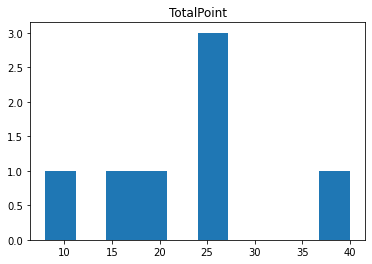

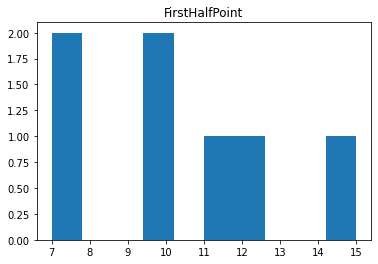

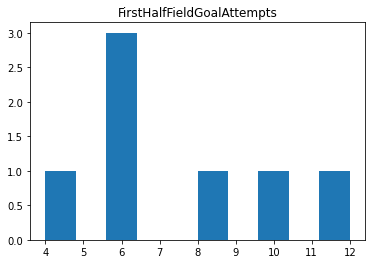

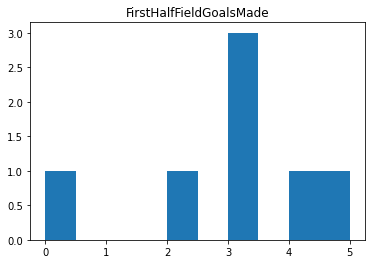

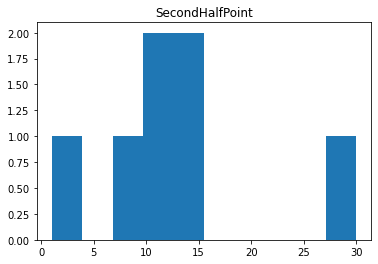

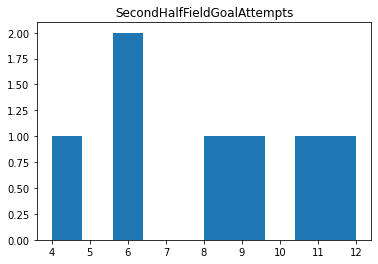

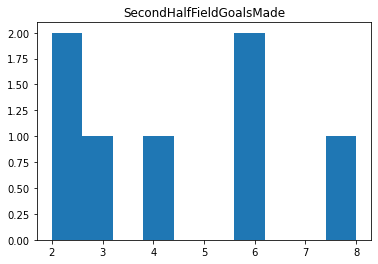

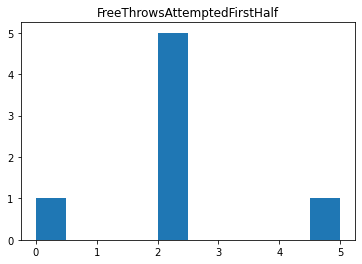

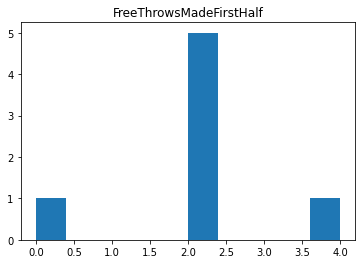

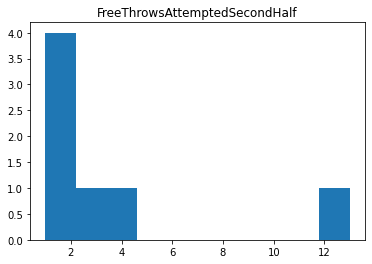

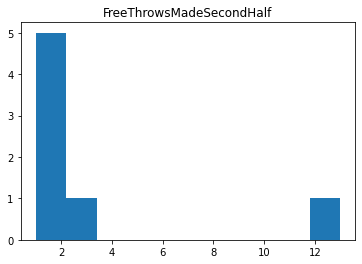

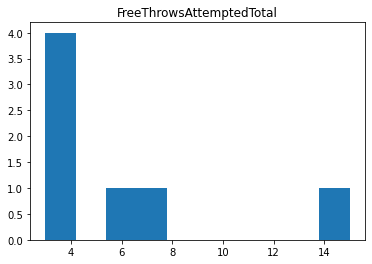

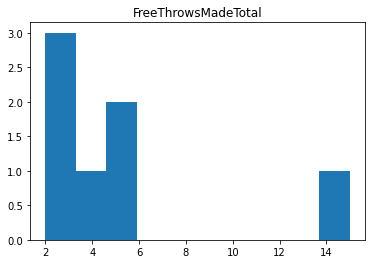

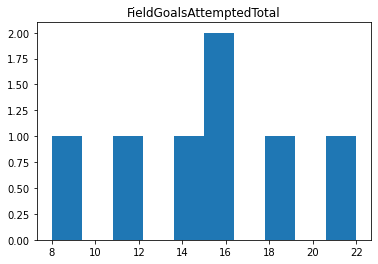

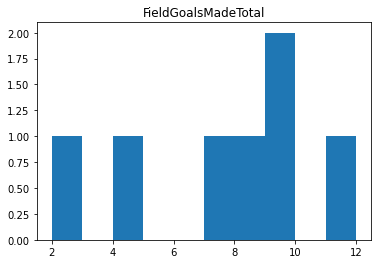

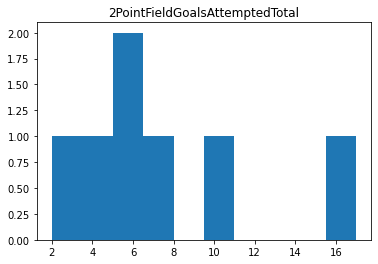

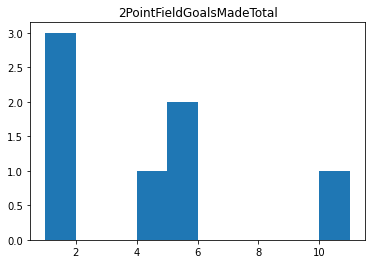

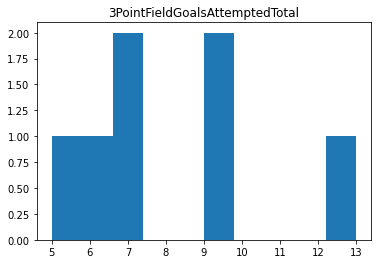

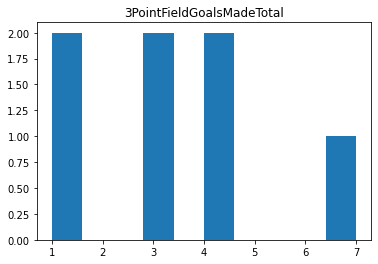

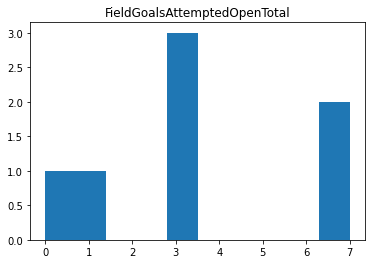

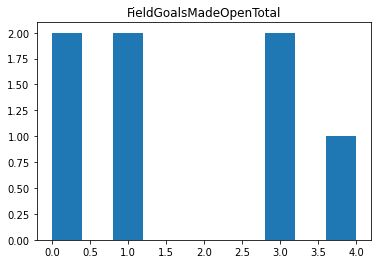

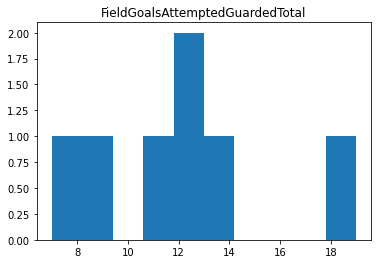

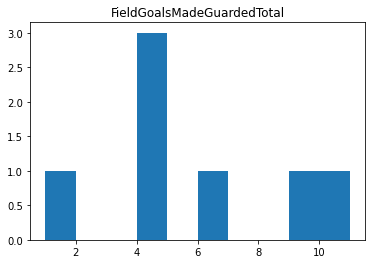

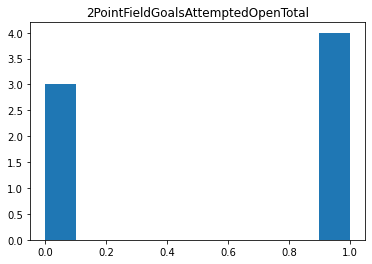

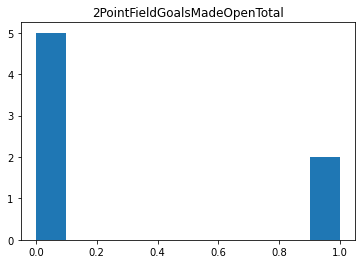

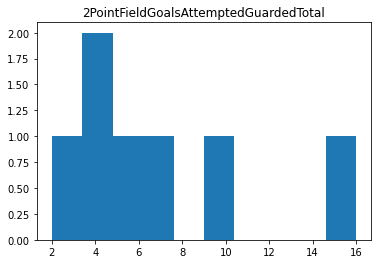

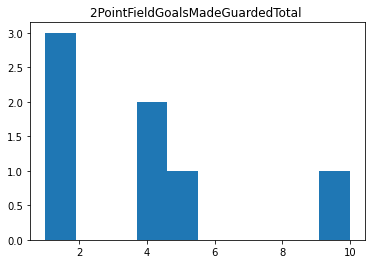

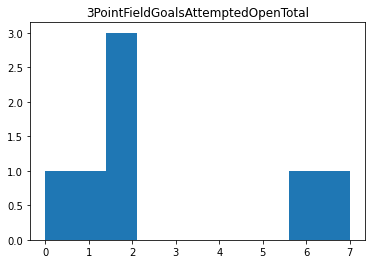

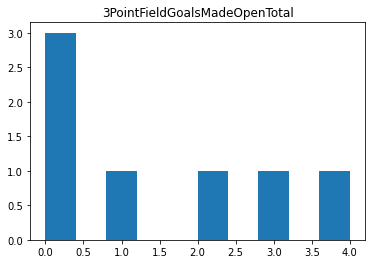

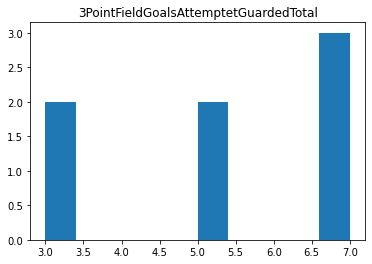

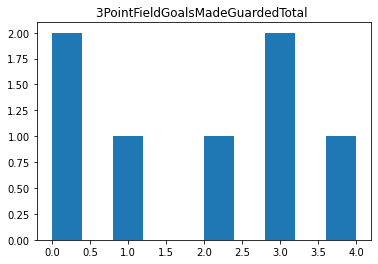

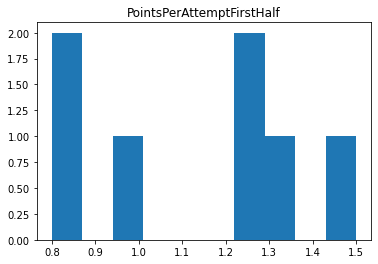

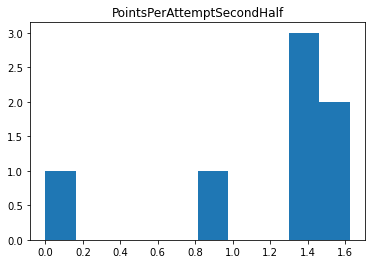

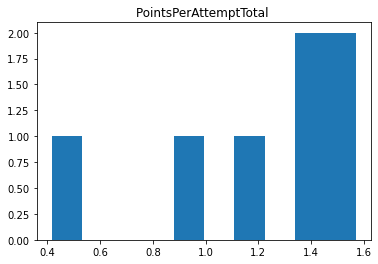

TypeError: 'value' must be an instance of str or bytes, not a int

In [407]:
# See distributions for numeric values 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

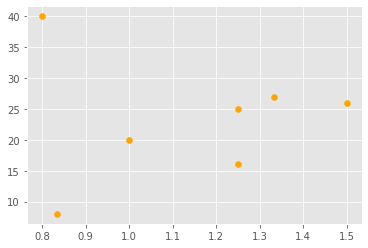

In [499]:
# Scatter Plots
plt.scatter(df_num.PointsPerAttemptFirstHalf.values, df_num.TotalPoint.values, marker ='o', color = 'orange')

<AxesSubplot:>

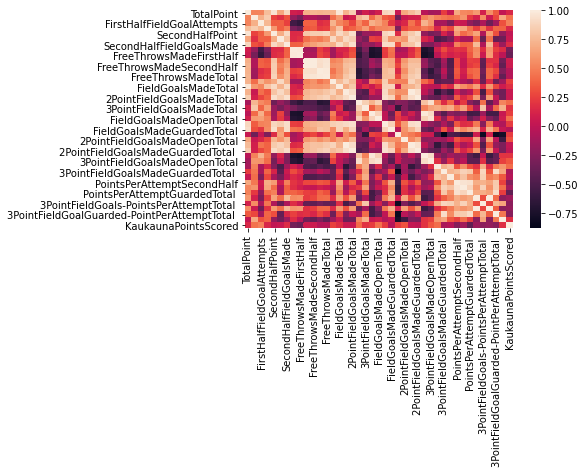

In [409]:
#Heat map correlations
shooting_correlation = df_num.corr()
sns.heatmap(shooting_correlation)

In [410]:
#Find correlations
shooting_correlation

,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,...,PointsPerAttemptFirstHalf,PointsPerAttemptSecondHalf,PointsPerAttemptTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored
TotalPoint,1.000000,0.513671,0.522352,0.774138,0.962535,0.669248,0.895169,0.089394,5.769383e-02,0.708536,...,0.034306,0.681882,0.534359,0.513082,0.604469,0.105054,0.563173,0.350386,2.386780e-02,0.139798
FirstHalfPoint,0.513671,1.000000,0.711777,0.839535,0.261778,0.184815,0.313093,-0.173553,-3.080252e-01,-0.067496,...,0.423371,0.469150,0.586630,0.220973,0.099268,0.552554,0.056296,0.275456,6.834843e-01,0.445984
FirstHalfFieldGoalAttempts,0.522352,0.711777,1.000000,0.745499,0.362632,0.376497,0.255128,-0.553900,-6.274950e-01,0.370833,...,-0.269387,0.071410,0.052381,-0.192763,-0.297807,-0.072844,-0.344844,-0.114780,3.146584e-01,0.503075
FirstHalfFieldGoalsMade,0.774138,0.839535,0.745499,1.000000,0.605484,0.366900,0.480430,-0.279078,-3.668997e-01,0.328897,...,0.275329,0.692204,0.665414,0.442564,0.245929,0.464077,0.190190,0.392667,3.794638e-01,0.138295
SecondHalfPoint,0.962535,0.261778,0.362632,0.605484,1.000000,0.694412,0.908004,0.155406,1.622458e-01,0.818346,...,-0.095211,0.618763,0.415690,0.507317,0.648579,-0.056455,0.615707,0.307086,-1.891583e-01,0.016308
SecondHalfFieldGoalAttempts,0.669248,0.184815,0.376497,0.366900,0.694412,1.000000,0.803596,0.157762,2.000000e-01,0.432274,...,-0.319902,0.090557,-0.072211,-0.085694,0.417008,-0.383073,0.437600,-0.386374,-3.422407e-01,0.050257
SecondHalfFieldGoalsMade,0.895169,0.313093,0.255128,0.480430,0.908004,0.803596,1.000000,0.374954,3.766854e-01,0.585293,...,0.009781,0.503983,0.362032,0.381201,0.764714,-0.069966,0.754447,0.138611,-1.511116e-01,0.157759
FreeThrowsAttemptedFirstHalf,0.089394,-0.173553,-0.553900,-0.279078,0.155406,0.157762,0.374954,1.000000,9.860133e-01,-0.106066,...,0.155665,0.207747,0.181841,0.387899,0.542866,0.167063,0.597500,0.251238,1.631645e-01,-0.325641
FreeThrowsMadeFirstHalf,0.057694,-0.308025,-0.627495,-0.366900,0.162246,0.200000,0.376685,0.986013,1.000000e+00,-0.069722,...,0.090881,0.146900,0.094444,0.339401,0.562310,0.056470,0.621953,0.168477,-1.753678e-16,-0.376928
FreeThrowsAttemptedSecondHalf,0.708536,-0.067496,0.370833,0.328897,0.818346,0.432274,0.585293,-0.106066,-6.972167e-02,1.000000,...,-0.493514,0.279926,0.037516,0.251161,0.233849,-0.397894,0.191478,0.193090,-3.330135e-01,0.070080


In [411]:
#Pivot table to see assits and point spread in first and second half
pd.pivot_table(ccm_analytics, index = 'TotalPoint', values = ['Assists', 'FirstHalfPoint', 'SecondHalfPoint'])

,Assists,FirstHalfPoint,SecondHalfPoint
TotalPoint,,,
8,7,7,1
16,7,7,9
20,7,10,10
25,11,15,10
26,6,11,15
27,11,12,15
40,6,10,30


In [412]:
# Going to machine learn to predict total points based on first half stats
y = ccm_analytics.TotalPoint
y


0    26
1     8
2    25
3    40
4    20
5    16
6    27
Name: TotalPoint, dtype: int64

In [413]:
# What to use from data to predict total points
ccm_features= ['FirstHalfPoint', 'FirstHalfFieldGoalAttempts', 'FreeThrowsAttemptedFirstHalf', 'PointsPerAttemptFirstHalf']


In [414]:
# Look at data to be used in prediction
X = ccm_analytics[ccm_features]
X.describe()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
count,7.000000,7.000000,7.000000,7.000000
mean,10.285714,7.428571,2.142857,1.138095
std,2.811541,2.760262,1.463850,0.264700
min,7.000000,4.000000,0.000000,0.800000
25%,8.500000,6.000000,2.000000,0.916667
50%,10.000000,6.000000,2.000000,1.250000
75%,11.500000,9.000000,2.000000,1.291667
max,15.000000,12.000000,5.000000,1.500000


In [415]:
# Look at first 5 values of prediction values
X.head()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
0,11,6,2,1.500000
1,7,6,2,0.833333
2,15,12,0,1.250000
3,10,10,2,0.800000
4,10,8,2,1.000000


In [416]:
# Used Decision Tree Regressor to split prediction values
from sklearn.tree import DecisionTreeRegressor
ccm_model = DecisionTreeRegressor(random_state = 0)
ccm_model.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [422]:
print("Making predictions for the following 5 games:")
print(X.head())
print("The predicitions are")
print(ccm_model.predict(X))

Making predictions for the following 5 games:
   FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirstHalf  \
0              11                           6                             2   
1               7                           6                             2   
2              15                          12                             0   
3              10                          10                             2   
4              10                           8                             2   

   PointsPerAttemptFirstHalf  
0                   1.500000  
1                   0.833333  
2                   1.250000  
3                   0.800000  
4                   1.000000  
The predicitions are
[26.  8. 40. 40. 20. 16. 26.]


In [423]:
# Model validation 
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)
ccm_model = DecisionTreeRegressor()
ccm_model.fit(train_X, train_y)
val_predictions = ccm_model.predict(val_X)
print("Mean absolute error: ", mean_absolute_error(val_y, val_predictions))

Mean absolute error:  8.0


In [424]:
# See if underfitting or overfitting and implement changes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y) :
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state = 0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [425]:
# Setting different tree sizes
candidate_max_leaf_nodes = {5, 25, 50, 100, 250, 500}
scores = {leaf_size : get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes
best_tree_size = best_tree_size = min(scores, key = scores.get)

In [426]:
# Create final model
final_ccm_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 0)
final_ccm_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=50, random_state=0)

In [427]:
# Finding mean absolute error
final_ccm_model_prediction = final_ccm_model.predict(val_X)
print(mean_absolute_error(val_y, final_ccm_model_prediction))

0.0


In [469]:
# Using Random Forest and letting it iterate 400 times through the data 

rf_model = RandomForestRegressor(n_estimators = 400, random_state = 1)
rf_model.fit(train_X, train_y)
ccm_rf_predict = rf_model.predict(val_X)
print("Machine Learning Prediction for val_y:", ccm_rf_predict)

print("Actual values for val_y: " ,val_y.values)

print("Mean absolute error:", mean_absolute_error(val_y, ccm_rf_predict))



Machine Learning Prediction for val_y: [22.235 27.135]
Actual values for val_y:  [27 25]
Mean absolute error: 3.450000000000001


In [444]:
# Create function for score_dataset
def score_dataset(train_X, val_x, train_y, val_y):
    model = RandomForestRegressor(n_estimators = 200, random_state = 1)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

In [446]:
cols_with_missing = [col for col in train_X.columns
                     if train_X[col].isnull().any()]

# Drop columns in training and validation data
reduced_train_X = train_X.drop(cols_with_missing, axis=1)
reduced_val_X = val_X.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_train_X, reduced_val_X, train_y, val_y))

MAE from Approach 1 (Drop columns with missing values):
3.49


In [450]:
# Create pipeline

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', rf_model)
                             ])
my_pipeline.fit(train_X, train_y)
predict_pip = my_pipeline.predict(val_X)
score = mean_absolute_error(val_y, predict_pip)
print("MAE:", score)

MAE: 3.450000000000001


In [449]:
# Create cross validation score
scores = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [13.51   13.58   10.9025  0.4975  4.1025]


In [454]:
# Print average MAE score
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
8.5185


In [456]:
# Use xgboost with early stopping rounds that stops running after 5 straight rounds of deteriorating validation scores. Learning rate lets us itterate more but not overfit the data by raising the learning rate(default is 0.01)

ccm_xgb_model = XGBRegressor(n_estimators=1000, learning_rate = 0.05)
ccm_xgb_model.fit(train_X, train_y, early_stopping_rounds = 5, eval_set = [(val_X, val_y)], verbose= False)
xgb_model_predictions = ccm_xgb_model.predict(val_X)
print("Machine learning predicting values with XGBRegressor: ", xgb_model_predictions)
print("Actual values :", val_y.values)
print("MAE: " + str(mean_absolute_error(xgb_model_predictions, val_y)))

Machine learning predicting values with XGBRegressor:  [21.19329  27.679808]
Actual values : [27 25]
MAE: 4.243258476257324


In [457]:
# Create pipeline for XGBRegressor model
new_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model',ccm_xgb_model)
                             ])
new_pipeline.fit(train_X, train_y)
predict_pip = my_pipeline.predict(val_X)
score = mean_absolute_error(val_y, predict_pip)
print("MAE:", score)

MAE: 3.450000000000001


In [458]:
# MAE Scores for XGB model
scores = -1 * cross_val_score(new_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [13.46620178 14.999053    1.28851891  7.99970245  2.10146904]


In [393]:
# MAE score for RandomForestRegressor model
scores = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [14.29125  2.155   22.8725   7.365    0.2575 ]


In [466]:
linear = linear_model.LinearRegression()
linear.fit(train_X, train_y)
acc = linear.score(val_X, val_y)
print(acc)

-1300.3312031063015


AttributeError: 'DataFrame' object has no attribute 'TotalPoints'